# 1) API Data Retrieval and Storage

In [140]:
import requests # for handling api requests
import pandas as pd # for creating dataframes
import sqlite3 # light weight database for experimenation

In [35]:
# get the url using open book api
url = "https://openlibrary.org/search.json?q=harry+potter&fields=key,title,author_name,first_publish_year"
response = requests.get(url)
data = response.json()
print(data['docs'][0])

{'author_name': ['J. K. Rowling'], 'first_publish_year': 1900, 'key': '/works/OL82563W', 'title': "Harry Potter and the Philosopher's Stone"}


In [44]:
# extract the data like title, author_name, first_publish_year
store = data['docs'][0]
title = store.get('title')
published_year = store.get('first_publish_year')
author_list = store.get('author_name')
author_loop = ""
for a in author_list:
  author_loop = a

In [56]:
# print all to verify data before add into database
author = author_loop
print(title)
print(published_year)
print(author)
movies_data = [(author, title, published_year)]

Harry Potter and the Philosopher's Stone
1900
J. K. Rowling


In [57]:
# connect to sqlite3
# create a database
con = sqlite3.connect("books_list.db")
cur = con.cursor()
cur.execute('CREATE TABLE books(author, title, published year)')
cur.executemany("INSERT INTO books VALUES(?,?,?)", movies_data)


In [58]:
con.commit()

In [138]:
# Display the data from sqlite3 database
res = cur.execute("SELECT * FROM books")
print(res.fetchall())

# close the connection after every operation
con.close()


[('J. K. Rowling', "Harry Potter and the Philosopher's Stone", 1900)]


# 2) Data Processing and Visualization

In [151]:
import matplotlib.pyplot as plt # matplot library used for visualization esp bar chart good library
# create a pandas dataframe
df = pd.read_csv("student_marks.csv")
df = df.rename(columns={"Unnamed: 0":"Name"}) # renamed columns for clarity
print(df.head(1))
print(df['Maths'])
print(df['Biology'])
print(df['Civics'])

   Name Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0  John      M  05/04/1988     55       45       56.0       87       21   

   Economics  History  Civics  
0         52       89      65  
0    55
1    75
2    25
3    78
4    58
Name: Maths, dtype: int64
0    21
1    90
2    95
3    54
4    96
Name: Biology, dtype: int64
0    65
1     2
2    74
3    45
4    53
Name: Civics, dtype: int64


In [143]:
# let us caluculate average Maths and Biology marks for example

print(df['Maths'].mean())
print(df['Biology'].mean())
print(df['Civics'].mean())

58.2
71.2
47.8


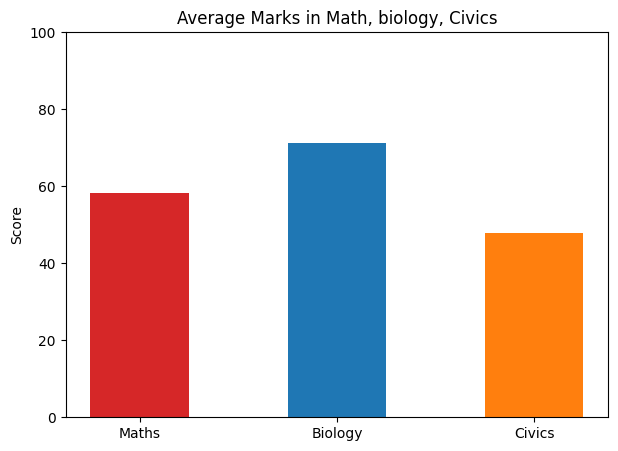

In [144]:
# now we can create a bar chart for all three subjects marks
subject_scores = [df['Maths'].mean(), df['Biology'].mean(), df['Civics'].mean()]
bar_labels = ['Maths','Biology','Civics']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.figure(figsize=(7,5))
plt.bar(bar_labels, subject_scores, width=0.5, color=bar_colors)
plt.title("Average Marks in Math, biology, Civics")
plt.ylabel("Score")
plt.ylim(0,100) # this is used for displaying y axis ranging from 0 to 100
plt.show()





# 3) CSV Data Import to a Database

In [180]:
# Note Iam using same csv which has name, gender and student marks I will write python script to add this to database
details_df = pd.read_csv("student_marks.csv", chunksize = 1)
print(df.columns)
print(df.head(1))

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')
   Name Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0  John      M  05/04/1988     55       45       56.0       87       21   

   Economics  History  Civics  
0         52       89      65  


In [181]:
print(df.dtypes)

Name          object
Gender        object
DOB           object
Maths          int64
Physics        int64
Chemistry    float64
English        int64
Biology        int64
Economics      int64
History        int64
Civics         int64
dtype: object


In [182]:
# creating a seperate database with name details
con = sqlite3.connect("details.db")
cur = con.cursor()



In [183]:
# use pandas sql function
# added chunksize for ram management and safety in case of large CSV file
for d in details_df:
  d.to_sql(name='details', if_exists='append', con=con)

In [184]:
# execute the sql command to check if data is added
res = cur.execute("SELECT * FROM details")
res.fetchall()


[(0, 'John', 'M', '05/04/1988', 55, 45, 56, 87, 21, 52, 89, 65),
 (1, 'Suresh', 'M', '4/5/1987', 75, 55, None, 64, 90, 61, 58, 2),
 (2, 'Ramesh', 'M', '25/5/1989', 25, 54, 89, 76, 95, 87, 56, 74),
 (3, 'Jessica', 'F', '12/8/1990', 78, 55, 86, 63, 54, 89, 75, 45),
 (4, 'Jennifer', 'F', '2/9/1989', 58, 96, 78, 46, 96, 77, 83, 53)]

In [185]:
# Thats successfull
# now important thing is to close the cursor
cur.close()